# 1. Load everything required

In [1]:
import numpy as np
import pandas as pd
from pycoingecko import CoinGeckoAPI
import os
import panel as pn
pn.extension('plotly')
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import inquirer
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import hvplot.pandas

import requests
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
style.use('ggplot')

C:\Users\josep\anaconda3\envs\uncc\lib\site-packages\blessed\terminal.py:188: UserWarning: Failed to setupterm(kind='xterm-color'): Could not find terminal xterm-color
  warnings.warn(msg)


# 2. Data Gathering for SNJ Index from Yahoo! Data
### Setting the dates, getting the crpto index values, creating the portfolio data, testing data returned

In [2]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2021, 4, 8) 

btc_p = web.DataReader('BTC-USD', 'yahoo', start, end) ['Close']
eth_p = web.DataReader('ETH-USD', 'yahoo', start, end) ['Close']
ltc_p = web.DataReader('LTC-USD', 'yahoo', start, end) ['Close']
link_p = web.DataReader('LINK-USD', 'yahoo', start, end) ['Close']
xrp_p = web.DataReader('XRP-USD', 'yahoo', start, end) ['Close']
trx_p = web.DataReader('TRX-USD', 'yahoo', start, end) ['Close']

# 3. Charting the SNJ Cryptos
### Using Yahoo! data to build charts for dashboad

In [3]:
#1. choose+crypto will be to ONLY take 1 crypto AND get current price
#2. apply results of sim aggregate "AVG Daily Pct.Change" * that price
#Choose_crypto = input()
prices = ((btc_p.pct_change()+eth_p.pct_change()+ltc_p.pct_change()+link_p.pct_change()+xrp_p.pct_change()+trx_p.pct_change())/6).round(4)
prices_4 = (btc_p + eth_p + ltc_p + xrp_p)
prices_test = ((btc_p + eth_p + ltc_p + xrp_p)/4)
#prices = abs(price2/6
#prices = xrp_p
combined_df=['btc_p', 'eth_p',  'ltc_p', 'xrp_p']
prices_5 = [btc_p, eth_p,  ltc_p, xrp_p]
returns = prices.pct_change()

#Crypto price history charts
btc_price = btc_p.hvplot.line('Bitcoin Average Close for day', label='BTC Price History', legend = True)
eth_price = eth_p.hvplot.line('Ethereum Average Close for day', label='ETH Prices', legend = True)
ltc_price = ltc_p.hvplot.line('Litecoin Average Close for day', label='LTC Prices', legend = True)
link_price = link_p.hvplot.line('Chainlink Average Close for day', label='LINK Prices', legend = True)
xrp_price = xrp_p.hvplot.line('Ripple Average Close for day', label='XRP Prices', legend = True)
trx_price = trx_p.hvplot.line('Tron Average Close for day', label='TRX Prices', legend = True)

# Crypto percent change charts
btc_percent= btc_p.pct_change().hvplot.line(title='Bitcoin Daily % Change',ylabel='The average % daily change', legend = True).opts(width=400, )
eth_percent= eth_p.pct_change().hvplot.line(title='Ethereum Daily % Change',ylabel='The average % daily change', legend = True).opts(width=400, )
ltc_percent= ltc_p.pct_change().hvplot.line(title='Litecoin Daily % Change',ylabel='The average % daily change', legend = True).opts(width=400, )
link_percent= link_p.pct_change().hvplot.line(title='Chainlink Daily % Change',ylabel='The average % daily change', legend = True).opts(width=400, )
xrp_percent= xrp_p.pct_change().hvplot.line(title='Ripple Daily % Change',ylabel='The average % daily change', legend = True).opts(width=400, )
trx_percent= trx_p.pct_change().hvplot.line(title='Tron Daily % Change',ylabel='The average % daily change', legend = True).opts(width=400, )

#Test chart load
eth_price


:Curve   [Ethereum Average Close for day]   (Close)

# 3.b. Building Data from Coingecko Data

In [4]:
#Loading CG API
cg = CoinGeckoAPI("https://api.coingecko.com/api/v3/")
#Test CG API
cg

In [5]:
# Testing CG data
cg.get_price(ids=['bitcoin', 'litecoin', 'ethereum', 'theta-token', 'vechain', 'chainlink'], vs_currencies='usd', history=90, days='365')

{'bitcoin': {'usd': 60608},
 'chainlink': {'usd': 41.0},
 'ethereum': {'usd': 2374.58},
 'litecoin': {'usd': 312.36},
 'vechain': {'usd': 0.222581},
 'theta-token': {'usd': 13.28}}

In [6]:
# Building CG Dataframes for charting
gecko_list = [
    "bitcoin",
    "ethereum",
    "litecoin",  
    "chainlink",
    "ripple",
    "tron",
]
############################
#df_cyptocurrency = pd.concat(frame_list,axis=1).sort_index()
#df_cyptocurrency 

#3 year period
timePeriod =463 

data = {}
for coin in gecko_list:
    try:
        nested_lists = cg.get_coin_market_chart_by_id(
            id=coin, vs_currency="usd", days=timePeriod
        )["prices"]
        data[coin] = {}
        data[coin]["timestamps"], data[coin]["values"] = zip(*nested_lists)

    except Exception as e:
        print(e)
        print("coin: " + coin)

frame_list = [
    pd.DataFrame(data[coin]["values"], index=data[coin]["timestamps"], columns=[coin])
    for coin in gecko_list
    if coin in data
]

df_cyptocurrency = pd.concat(frame_list,axis=1).sort_index()
df_cyptocurrency 

###################################
df_cyptocurrency["datetime"] = pd.to_datetime(df_cyptocurrency.index, unit="ms")
df_cyptocurrency["date"] = df_cyptocurrency["datetime"].dt.date
df_cyptocurrency["hour"] = df_cyptocurrency["datetime"].dt.hour

####################################

df_cyptocurrency = df_cyptocurrency.melt(
    id_vars=["datetime", "date", "hour"], var_name="currency_name", ignore_index=True
)
#Test dataframe
df_cyptocurrency

datetime        date  hour currency_name        value
0    2020-01-11 00:00:00  2020-01-11     0       bitcoin  8180.513170
1    2020-01-12 00:00:00  2020-01-12     0       bitcoin  8012.085782
2    2020-01-13 00:00:00  2020-01-13     0       bitcoin  8171.401185
3    2020-01-14 00:00:00  2020-01-14     0       bitcoin  8110.647965
4    2020-01-15 00:00:00  2020-01-15     0       bitcoin  8801.871213
...                  ...         ...   ...           ...          ...
2809 2021-04-17 12:28:49  2021-04-17    12          tron          NaN
2810 2021-04-17 12:29:19  2021-04-17    12          tron          NaN
2811 2021-04-17 12:56:32  2021-04-17    12          tron          NaN
2812 2021-04-17 14:55:01  2021-04-17    14          tron          NaN
2813 2021-04-17 15:22:36  2021-04-17    15          tron          NaN

[2814 rows x 5 columns]

In [7]:
#Rename column names for charts
#We want the names to display a little better

new_df_cyptocurrency = pd.DataFrame(df_cyptocurrency)
print("\Before modifying name column:\n", df_cyptocurrency.columns)
new_df_cyptocurrency.rename(columns = {'currency_name' : 'Crypto Name'}, inplace = True)
print("\nAfter modifying name column:\n", new_df_cyptocurrency.columns)

\Before modifying name column:
 Index(['datetime', 'date', 'hour', 'currency_name', 'value'], dtype='object')

After modifying name column:
 Index(['datetime', 'date', 'hour', 'Crypto Name', 'value'], dtype='object')


In [8]:
#Charting cryptos with CG data
crypto_index_chart=df_cyptocurrency.hvplot.line('date','value', groupby='Crypto Name', title = 'Crypto Price History: 493 Days', width=600,widget_location='bottom')
crypto_index_chart


Column
    [0] HoloViews(DynamicMap, widget_location='bottom')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='Crypto Name', options=['bitcoin', 'ethereum', ...], value='bitcoin', width=250)
        [2] HSpacer()

# 4. SNJ Headed to Monte Carlo

In [9]:
import fix_yahoo_finance as yf

df2 = yf.download("BTC-USD ETH-USD LTC-USD LINK-USD XRP-USD TRX-USD", start="2020-01-01", end="2021-04-08",group_by="close")
#print(df2)
#print(df2.BTC-USD)
df2.pct_change().head(100).dropna()

[*********************100%***********************]  6 of 6 downloaded


LTC-USD                                                    \
                Open      High       Low     Close Adj Close    Volume   
Date                                                                     
2020-01-02  0.016695 -0.003783 -0.038992 -0.052356 -0.052356 -0.008324   
2020-01-03 -0.051404  0.007596 -0.005796  0.065294  0.065294  0.181582   
2020-01-04  0.063221  0.020966  0.062864  0.021452  0.021452 -0.128112   
2020-01-05  0.021472  0.032072  0.025519  0.005077  0.005077  0.061183   
2020-01-06  0.007161  0.027498  0.011395  0.052124  0.052124  0.110067   
...              ...       ...       ...       ...       ...       ...   
2020-04-05  0.008676  0.004164 -0.000751 -0.000246 -0.000246 -0.044996   
2020-04-06 -0.000737  0.085122  0.015277  0.091468  0.091468  0.390326   
2020-04-07  0.091982  0.060913  0.088061  0.006308  0.006308  0.024090   
2020-04-08  0.006306 -0.009534  0.005441  0.036938  0.036938 -0.127557   
2020-04-09  0.037377 -0.003636  0.018489  0.001295  0.001295 -0.053016   

            LINK-USD                                ...   TRX-USD            \
                Open      High       Low     Close  ...       Low     Close   
Date                                                ...                       
2020-01-02  0.022599 -0.016216 -0.022727 -0.038674  ... -0.030303 -0.022727   
2020-01-03 -0.038674  0.005495 -0.005814  0.040230  ...  0.000000  0.038760   
2020-01-04  0.040230  0.010929  0.046784  0.016575  ...  0.039062  0.007463   
2020-01-05  0.016575  0.005405  0.005587 -0.016304  ...  0.015038  0.007407   
2020-01-06 -0.016304  0.043011  0.005556  0.071823  ...  0.007407  0.066176   
...              ...       ...       ...       ...  ...       ...       ...   
2020-04-05  0.008658  0.000000 -0.004405 -0.021459  ...  0.008475  0.050000   
2020-04-06 -0.021459  0.081545  0.008850  0.100877  ...  0.058824  0.087302   
2020-04-07  0.105263  0.138889  0.105263  0.083665  ...  0.047619 -0.029197   
2020-04-08  0.079365  0.128920  0.075397  0.154412  ...  0.000000  0.030075   
2020-04-09  0.154412  0.064815  0.154982  0.057325  ...  0.007576 -0.014599   

                                 XRP-USD                                \
           Adj Close    Volume      Open      High       Low     Close   
Date                                                                     
2020-01-02 -0.022727  0.023180 -0.001037 -0.007716 -0.027069 -0.024390   
2020-01-03  0.038760  0.109617 -0.024909  0.006221 -0.005886  0.029255   
2020-01-04  0.007463 -0.105998  0.029803  0.003091  0.032293  0.004651   
2020-01-05  0.007407  0.088442  0.004651  0.023112  0.010949  0.005658   
2020-01-06  0.066176  0.115687  0.005658  0.123494  0.006189  0.132992   
...              ...       ...       ...       ...       ...       ...   
2020-04-05  0.050000  0.121847  0.012249 -0.001646 -0.005609 -0.012658   
2020-04-06  0.087302  0.115287 -0.012101  0.076374  0.011844  0.089744   
2020-04-07 -0.029197 -0.072242  0.089644  0.040837  0.065775 -0.017391   
2020-04-08  0.030075  0.150472 -0.018396 -0.012751  0.001046  0.045809   
2020-04-09 -0.014599 -0.090616  0.046330  0.000000  0.023511 -0.012942   

                                
           Adj Close    Volume  
Date                            
2020-01-02 -0.024390  0.042470  
2020-01-03  0.029255  0.170144  
2020-01-04  0.004651 -0.213135  
2020-01-05  0.005658  0.168849  
2020-01-06  0.132992  0.970502  
...              ...       ...  
2020-04-05 -0.012658 -0.074062  
2020-04-06  0.089744  0.523104  
2020-04-07 -0.017391  0.038073  
2020-04-08  0.045809 -0.203762  
2020-04-09 -0.012942 -0.101583  

[99 rows x 36 columns]

In [10]:
last_price = prices[-2]
last_price

0.0747

In [11]:
#number of sims
number_simulations = 500
number_days = 493

In [12]:
#set df for simulation
simulation_df = pd.DataFrame()

In [13]:
#set values for monte carlo simulation

for x in range (number_simulations):
    count = 0
    daily_volatility = prices.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_volatility))
    price_series.append(price)
    
    for y in range(number_days):
        if count == 492:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_volatility))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series       

In [14]:
#Simulation outcome
simulation_df

0         1         2         3         4         5         6    \
0    0.077763  0.072835  0.075830  0.074392  0.076487  0.076207  0.076568   
1    0.071416  0.070531  0.068865  0.078007  0.081754  0.079935  0.080128   
2    0.074255  0.066511  0.072462  0.073331  0.084980  0.073394  0.082379   
3    0.070726  0.065157  0.070033  0.066531  0.090782  0.075136  0.083439   
4    0.073953  0.065468  0.068885  0.072934  0.094278  0.076420  0.086082   
..        ...       ...       ...       ...       ...       ...       ...   
488  0.050500  0.013658  0.005764  0.106781  0.031270  0.019026  0.111054   
489  0.047200  0.014046  0.005579  0.115178  0.033552  0.019794  0.108770   
490  0.046941  0.014252  0.005368  0.102998  0.033555  0.019114  0.119374   
491  0.046676  0.015006  0.005418  0.096318  0.029853  0.019151  0.116176   
492  0.043159  0.014648  0.005361  0.096204  0.028403  0.019336  0.113987   

          7         8         9    ...       490       491       492  \
0    0.075973  0.077106  0.081967  ...  0.080488  0.071345  0.077168   
1    0.072822  0.082216  0.087352  ...  0.079262  0.076631  0.079793   
2    0.071655  0.077609  0.089676  ...  0.078786  0.076921  0.080864   
3    0.065951  0.070845  0.085835  ...  0.077409  0.077545  0.079049   
4    0.070920  0.077578  0.084074  ...  0.069028  0.077231  0.083675   
..        ...       ...       ...  ...       ...       ...       ...   
488  0.002984  0.265782  0.094330  ...  0.040236  0.079469  0.330233   
489  0.002937  0.271485  0.088669  ...  0.040529  0.078990  0.332475   
490  0.002965  0.256619  0.085963  ...  0.039418  0.080598  0.309892   
491  0.003232  0.261420  0.083002  ...  0.039108  0.080876  0.328979   
492  0.003593  0.244284  0.084838  ...  0.035577  0.077900  0.323390   

          493       494       495       496       497       498       499  
0    0.075309  0.070762  0.078537  0.074105  0.074424  0.076176  0.075966  
1    0.077391  0.070680  0.076630  0.072348  0.078141  0.073845  0.080635  
2    0.079235  0.072922  0.075651  0.074198  0.079371  0.073062  0.081611  
3    0.075029  0.070922  0.074456  0.073151  0.079114  0.072428  0.079424  
4    0.079920  0.077946  0.081479  0.080369  0.079830  0.081665  0.079452  
..        ...       ...       ...       ...       ...       ...       ...  
488  0.022002  0.026137  0.054084  0.011955  0.015002  0.338767  0.136324  
489  0.021894  0.025111  0.050979  0.011900  0.015578  0.348306  0.132498  
490  0.021375  0.026319  0.052087  0.011724  0.016337  0.322608  0.124818  
491  0.021477  0.027339  0.051796  0.011898  0.016336  0.301029  0.132377  
492  0.022043  0.027115  0.054436  0.012320  0.017390  0.300100  0.136052  

[493 rows x 500 columns]

# 5. SNJ Index Simulation Outcomes

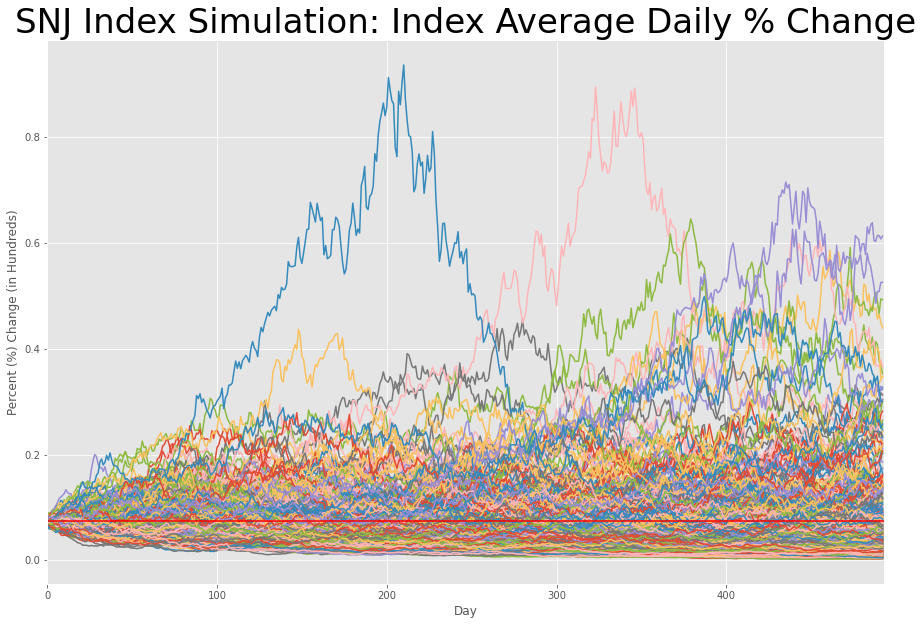

In [15]:
# SNJ Index Monte Carlo Plot

fig_index_monte = plt.figure(figsize=(15,10))
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.title('SNJ Index Simulation: Index Average Daily % Change', fontsize = 34)
plt.xlabel('Day')
plt.xlim(0, 493)
plt.ylabel('Percent (%) Change (in Hundreds)')
#plt.ylim(1500, )
plt.show()

In [16]:
#Getting SNJ index Average EOY values
annual_values = (simulation_df).iloc[492].sort_values(ascending = False).round(4)
annual_values

478    0.6132
240    0.5257
40     0.4929
39     0.4393
209    0.3656
        ...  
381    0.0039
7      0.0036
254    0.0036
411    0.0035
315    0.0031
Name: 492, Length: 500, dtype: float64

In [17]:
#Get the Index values range; mean, median, max, min
#mean_round = round(annual_values.mean,2)

print(f'The Crypto Index Average Price % Change the Next 493 Days is {100*(annual_values.mean())} %')
print(f'The Crypto Index Median Price % Change the Next 493 Days is {100*(annual_values.median())} %')
print(f'The Crypto Index MAXIMUM Price % Change the Next 493 Days is {100*(annual_values.max())} %')
print(f'The Crypto Index LOWEST Price % Change the Next 493 Days is {100*(annual_values.min())} %')

The Crypto Index Average Price % Change the Next 493 Days is 6.651980000000002 %
The Crypto Index Median Price % Change the Next 493 Days is 3.885 %
The Crypto Index MAXIMUM Price % Change the Next 493 Days is 61.31999999999999 %
The Crypto Index LOWEST Price % Change the Next 493 Days is 0.31 %


<AxesSubplot:title={'center':'Plot of Simulated Outcome'}, xlabel='Price Range', ylabel='Deviation'>

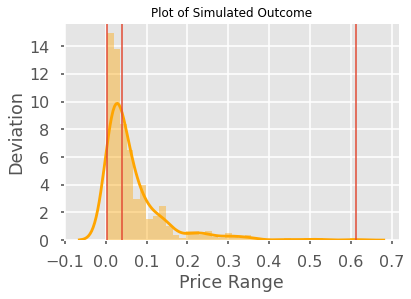

In [18]:
# Seaborn Chart
import seaborn as seabornInstance
import seaborn as sns
plt.style.use('seaborn-poster')
%matplotlib inline

fig_index_dist = seabornInstance.distplot(annual_values, color='orange')
#seabornInstance.JointGrid(annual_values, color='orange')
#sns.set_theme()
#sns.boxplot(data=annual_values, palette="deep")
#sns.set_style("whitegrid")
#sns.despine(left=True)
sns.set_context("poster", font_scale=.5, rc={"lines.linewidth": 1.5})
plt.axvline(x=annual_values.median())
plt.axvline(x=annual_values.max())
plt.axvline(x=annual_values.min())
plt.title('Plot of Simulated Outcome')
plt.xlabel('Price Range')
#plt.xlim(.5, 1.3)
plt.ylabel('Deviation')

fig_index_dist

<AxesSubplot:title={'center':'Swamplot of Simulated Outcome'}, xlabel='492'>

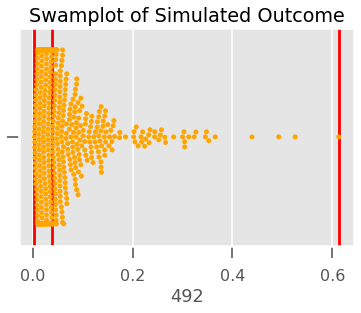

In [19]:
#Swarm plot of simulated SNJ data
import seaborn as seabornInstance
import seaborn as sns
plt.style.use('seaborn-poster')
%matplotlib inline

fig_index_swarm = seabornInstance.swarmplot(annual_values, color='orange')

plt.axvline(x=annual_values.median(), color='red')
plt.axvline(x=annual_values.max(), color='red')
plt.axvline(x=annual_values.min(), color='red')
plt.title('Swamplot of Simulated Outcome')

fig_index_swarm

# 6. Getting the New Cryptos in to Play
## Back to Monte Carlo and Beyond!

In [20]:
#testing values for getting additional cryptos from Yahoo finance
coti_p = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
ewt_p = web.DataReader('EWT-USD', 'yahoo', start, end) ['Close']
kda_p = web.DataReader('KDA-USD', 'yahoo', start, end) ['Close']

#cryto_choice = 
coti_p.pct_change().round(4)

Date
2020-01-01       NaN
2020-01-02   -0.0415
2020-01-03    0.0622
2020-01-04    0.1133
2020-01-05    0.0155
               ...  
2021-04-04   -0.0031
2021-04-05    0.1154
2021-04-06   -0.1540
2021-04-07    0.0392
2021-04-08    0.0028
Name: Close, Length: 437, dtype: float64

In [43]:
#get user input to create new_crypto variable
choice = input("Enter COTI, EWT or KDA: ")

if choice == 'COTI' :
    print("You chose COTI to project future performance") 
    #new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
elif choice == 'EWT' :
    print("You chose Energy Web to project future performance")
    #new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
elif choice == 'KDA' :
    print("You chose Kadena to project future performance")
    #new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
else:
    print("Invalid choice")

Enter COTI, EWT or KDA:  COTI


You chose COTI to project future performance


In [44]:
#assign value for new new_crypto_choice variable
if choice == 'COTI':
    new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
elif choice == 'EWT':
    new_crypto_choice = web.DataReader('EWT-USD', 'yahoo', start, end) ['Close']
elif choice == 'KDA':
    new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
else:
    print("Invalid crypto choice provided")

In [45]:
new_crypto_choice
new_crypto_returns = new_crypto_choice.pct_change().round(4)
new_crypto_returns

Date
2020-01-01       NaN
2020-01-02   -0.0415
2020-01-03    0.0622
2020-01-04    0.1133
2020-01-05    0.0155
               ...  
2021-04-04   -0.0031
2021-04-05    0.1154
2021-04-06   -0.1540
2021-04-07    0.0392
2021-04-08    0.0028
Name: Close, Length: 437, dtype: float64

# 5. NEW Simulation for New Crypto Values
### Back to Monte Carlo

In [46]:
#Make sure the required variables for the new crypto are avauilable
new_crypto_choice
new_crypto_returns = new_crypto_choice.pct_change().round(4)
new_crypto_returns
last_crpyto_price = new_crypto_choice[-1]

In [47]:
#number of sims
number_simulationsc = 500
number_daysc = 493

In [48]:
#Variable for new sim df
new_simulation_df = pd.DataFrame()

In [49]:
#Sim for the new crypto data
for x in range (number_simulationsc):
    count = 0
    daily_volatility_2 = new_crypto_choice.std()
    
    price_series_new = []
    
    price_new = last_crpyto_price * (1 + np.random.normal(0, daily_volatility_2))
    price_series_new.append(price)
    
    for y in range(number_daysc):
        if count == 462:
            break
        price_new = price_series_new[count] * (1 + np.random.normal(0, daily_volatility_2))
        price_series_new.append(price_new)
        count += 1
    
    new_simulation_df[x] = price_series_new     

In [50]:
new_simulation_df.head()

0         1         2         3         4         5         6    \
0  0.136052  0.136052  0.136052  0.136052  0.136052  0.136052  0.136052   
1  0.129575  0.125291  0.154286  0.152887  0.159450  0.122347  0.150526   
2  0.127293  0.135568  0.144090  0.157122  0.173195  0.128284  0.178414   
3  0.115657  0.144939  0.119349  0.159556  0.171607  0.118160  0.190905   
4  0.119115  0.169721  0.102249  0.134407  0.158781  0.116244  0.220249   

        7         8         9    ...       490       491       492       493  \
0  0.136052  0.136052  0.136052  ...  0.136052  0.136052  0.136052  0.136052   
1  0.143033  0.136462  0.151092  ...  0.138650  0.136455  0.130188  0.115954   
2  0.144000  0.157985  0.166128  ...  0.124146  0.134763  0.127046  0.120325   
3  0.127139  0.151007  0.171907  ...  0.136720  0.156763  0.113354  0.082144   
4  0.116746  0.159827  0.143294  ...  0.127656  0.171398  0.097092  0.078318   

        494       495       496       497       498       499  
0  0.136052  0.136052  0.136052  0.136052  0.136052  0.136052  
1  0.126689  0.123774  0.152227  0.131810  0.139879  0.132741  
2  0.088694  0.127669  0.165183  0.144482  0.159623  0.141413  
3  0.091422  0.132463  0.163931  0.129844  0.135575  0.129808  
4  0.092444  0.136573  0.190907  0.154080  0.132466  0.118238  

[5 rows x 500 columns]

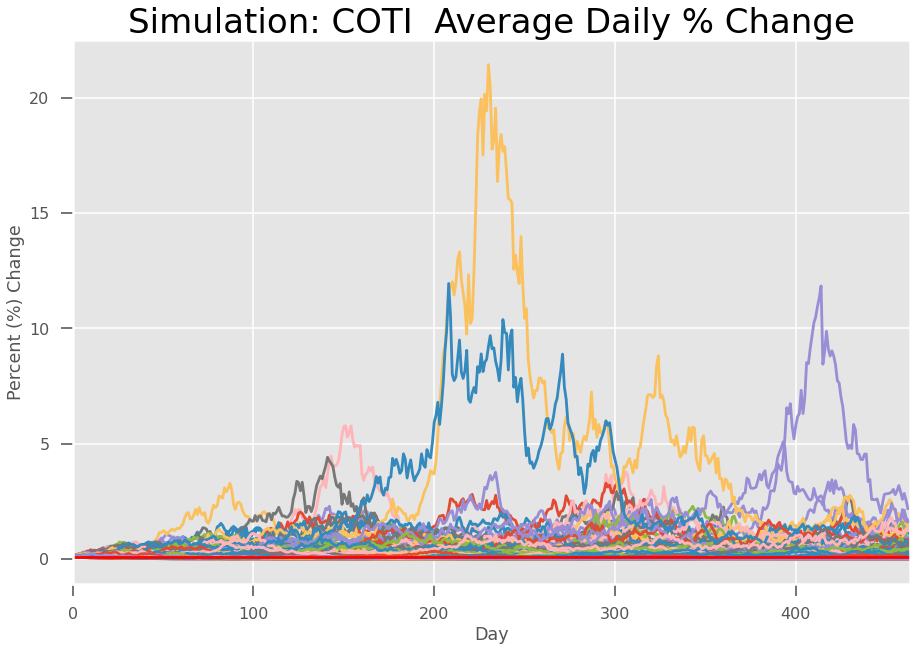

In [51]:
#Plot the Monte Carlo sim. and show for new crpyto
fig_crypto_monte = plt.figure(figsize=(15,10))
plt.plot(new_simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.title('Simulation: '+ choice + '  Average Daily % Change', fontsize = 34)
plt.xlabel('Day')
plt.xlim(0, 463)
plt.ylabel('Percent (%) Change')
#plt.ylim(1500, )
plt.show()

#fig_crypto_monte

In [52]:
#Getting Average EOY values for New Crypto
annual_values_c = (new_simulation_df).iloc[462].sort_values(ascending = False).round(4)
annual_values_c

338    2.1829
205    1.6773
422    1.6664
142    1.6387
129    1.6323
        ...  
202    0.0000
40     0.0000
262    0.0000
78     0.0000
286    0.0000
Name: 462, Length: 500, dtype: float64

In [53]:
#show the new crypto values range; mean, median, max, min

print(f'The NEW Crypto Average Price % Change the Next 365 Days is (+/-) {100*(annual_values_c.mean())} %')
print(f'The NEW Crypto Median Price % Change the Next 365 Days is (+/-) {100*(annual_values_c.median())} %')
print(f'The NEW Crypto MAXIMUM Price % Change the Next 365 Days is (+/-) {100*(annual_values_c.max())} %')
print(f'The NEW Crypto LOWEST Price % Change the Next 365 Days is (+/-) {100*(annual_values_c.min())} %')

The NEW Crypto Average Price % Change the Next 365 Days is (+/-) 10.185820000000001 %
The NEW Crypto Median Price % Change the Next 365 Days is (+/-) 1.04 %
The NEW Crypto MAXIMUM Price % Change the Next 365 Days is (+/-) 218.29000000000002 %
The NEW Crypto LOWEST Price % Change the Next 365 Days is (+/-) 0.0 %


<AxesSubplot:title={'center':'Plot of Simulated Outcome for New Crypto '}, xlabel='Price Range', ylabel='Deviation'>

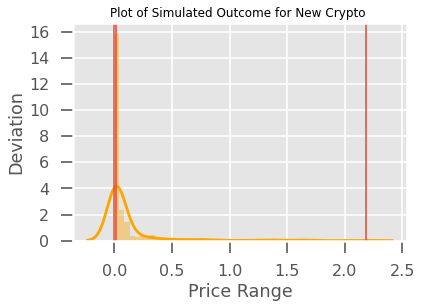

In [54]:
# Seaborn Chart
import seaborn as seabornInstance
import seaborn as sns
plt.style.use('seaborn-poster')
%matplotlib inline

fig_crypto_dist = seabornInstance.distplot(annual_values_c, color='orange')
#seabornInstance.JointGrid(annual_values, color='orange')
#sns.set_theme()
#sns.boxplot(data=annual_values, palette="deep")
#sns.set_style("whitegrid")
#sns.despine(left=True)
sns.set_context("poster", font_scale=.5, rc={"lines.linewidth": 1.5})
plt.axvline(x=annual_values_c.median())
plt.axvline(x=annual_values_c.max())
plt.axvline(x=annual_values_c.min())
plt.title('Plot of Simulated Outcome for New Crypto ' )
plt.xlabel('Price Range')
#plt.xlim(.5, 1.3)
plt.ylabel('Deviation')


fig_crypto_dist

<AxesSubplot:title={'center':'Swamplot of Simulated Outcome for New Crypto'}, xlabel='462'>

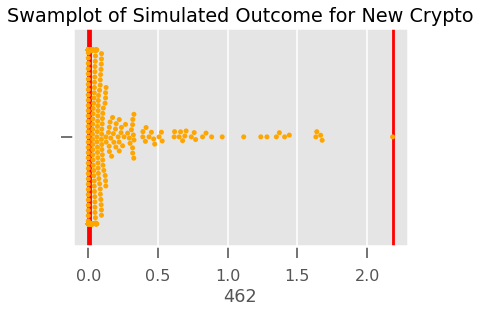

In [55]:
#Swarm plot of simulated New Crypto data
import seaborn as seabornInstance
import seaborn as sns
plt.style.use('seaborn-poster')
%matplotlib inline

fig_crypto_swarm = seabornInstance.swarmplot(annual_values_c, color='orange')

plt.axvline(x=annual_values_c.median(), color='red')
plt.axvline(x=annual_values_c.max(), color='red')
plt.axvline(x=annual_values_c.min(), color='red')
plt.title('Swamplot of Simulated Outcome for New Crypto')

fig_crypto_swarm

# 6. Dashboarding the Results

In [56]:
# Dashboard Chart Plots

def snj_btc():
    return btc_percent()
def snj_eth():
    return eth_percent()
def snj_ltc():
    return ltc_percent()
def snj_link():
    return link_percent()
def snj_xrp():
    return xrp_percent()
def snj_tron():
    return trx_percent()


def cpt_port_choice():
    return crypto_index_chart()

# tab 2 charts
def index_monte():
    return fig_index_dist()

def index_dist():
    return fig_index_dist()

def index_swarm():
    fig_crypto_swarm = seabornInstance.swarmplot(annual_values_c, color='orange')

    plt.axvline(x=annual_values_c.median(), color='red')
    plt.axvline(x=annual_values_c.max(), color='red')
    plt.axvline(x=annual_values_c.min(), color='red')
    plt.title('Swamplot of Simulated Outcome for New Crypto')


    
    return fig_index_swarm()



def crypto_index_monte():
    return fig_index_monte

def new_crypto_monte():
    return fig_crypto_monte

trx_percent()

:Curve   [Date]   (Close)

In [57]:
# Dashboard Plot

import seaborn as seabornInstance
import seaborn as sns

crypto_portfolio_plots1  = pn.Column(
    '## SNJ Crypto History',
    pn.Row(
        btc_price.opts(title='Bitcoin Price History'), 
        eth_price.opts(title='Ethereum Price History'),),
    pn.Row(
        ltc_price.opts(title='Litecoin Price History'),
        link_price.opts(title='Chainlink Price History'),),
    pn.Row(
        xrp_price.opts(title='Ripple Price History'), 
        trx_price.opts(title='Tron Price History'), ),
        #cpt_port_choice(),
)


crypto_portfolio_plots2  = pn.Column(
    '## Chart Crypto Index Monte',
    pn.Row(
        btc_percent.opts(title='Bitcoin % Daily Change'), 
        eth_percent.opts(title='Ethereum % Daily Change'), 
        ltc_percent.opts(title='Litecoin % Daily Change'), ),
    pn.Row(
        link_percent.opts(title='Chainlink % Daily Change'), 
        xrp_percent.opts(title='Ripple % Daily Change'), 
        trx_percent.opts(title='Tron % Daily Change'), ),
        #cpt_port_choice(),
)



crypto_monte_plots1 = pn.Column(
    '# Chart SNJ Index Monte',
    '## This is a simulation of the cryptos making up the SNJ index, combined, and ran with the following:',
    '#### %Change of the Average Daily Close, over 493 days',
    ' Yes, we know it is a strange number',
    crypto_index_monte(),
    #pn.Row(
        #index_dist(),
        #fig_index_swarm(),)
)


crypto_monte_plots2 = pn.Column(
    '## Chart New Crypto Monte',
    pn.Row(
        'The NEW Crypto Average Price % Change the Next 493 Days is (+/-) 6.4282 % ',
        'The NEW Crypto Median Price % Change the Next 493 Days is ###(+/-) 0.445 %',),
    pn.Row(
        'The NEW Crypto MAXIMUM Price % Change the Next 493 Days is ###(+/-) 911.800 %',
        'The NEW Crypto LOWEST Price % Change the Next 493 Days is ###(+/-) 0.0001 %',),
    new_crypto_monte(),
)

dashboard = pn.Tabs(
    ('Crypto SNJ Index: History' , crypto_portfolio_plots1),
    ('Crypto SNJ Index: Daily % Change', crypto_portfolio_plots2), 
    ('Crypto Index Dive', crypto_monte_plots1),
    ('New Crypto Dive ('+ choice + ')', crypto_monte_plots2)
)


Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(Curve)
            [1] HoloViews(Curve)
        [2] Row
            [0] HoloViews(Curve)
            [1] HoloViews(Curve)
        [3] Row
            [0] HoloViews(Curve)
            [1] HoloViews(Curve)
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(Curve)
            [1] HoloViews(Curve)
            [2] HoloViews(Curve)
        [2] Row
            [0] HoloViews(Curve)
            [1] HoloViews(Curve)
            [2] HoloViews(Curve)
    [2] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Markdown(str)
        [3] Markdown(str)
        [4] Matplotlib(Figure)
    [3] Column
        [0] Markdown(str)
        [1] Row
            [0] Markdown(str)
            [1] Markdown(str)
        [2] Row
            [0] Markdown(str)
            [1] Markdown(str)
        [3] Matplotlib(Figure)
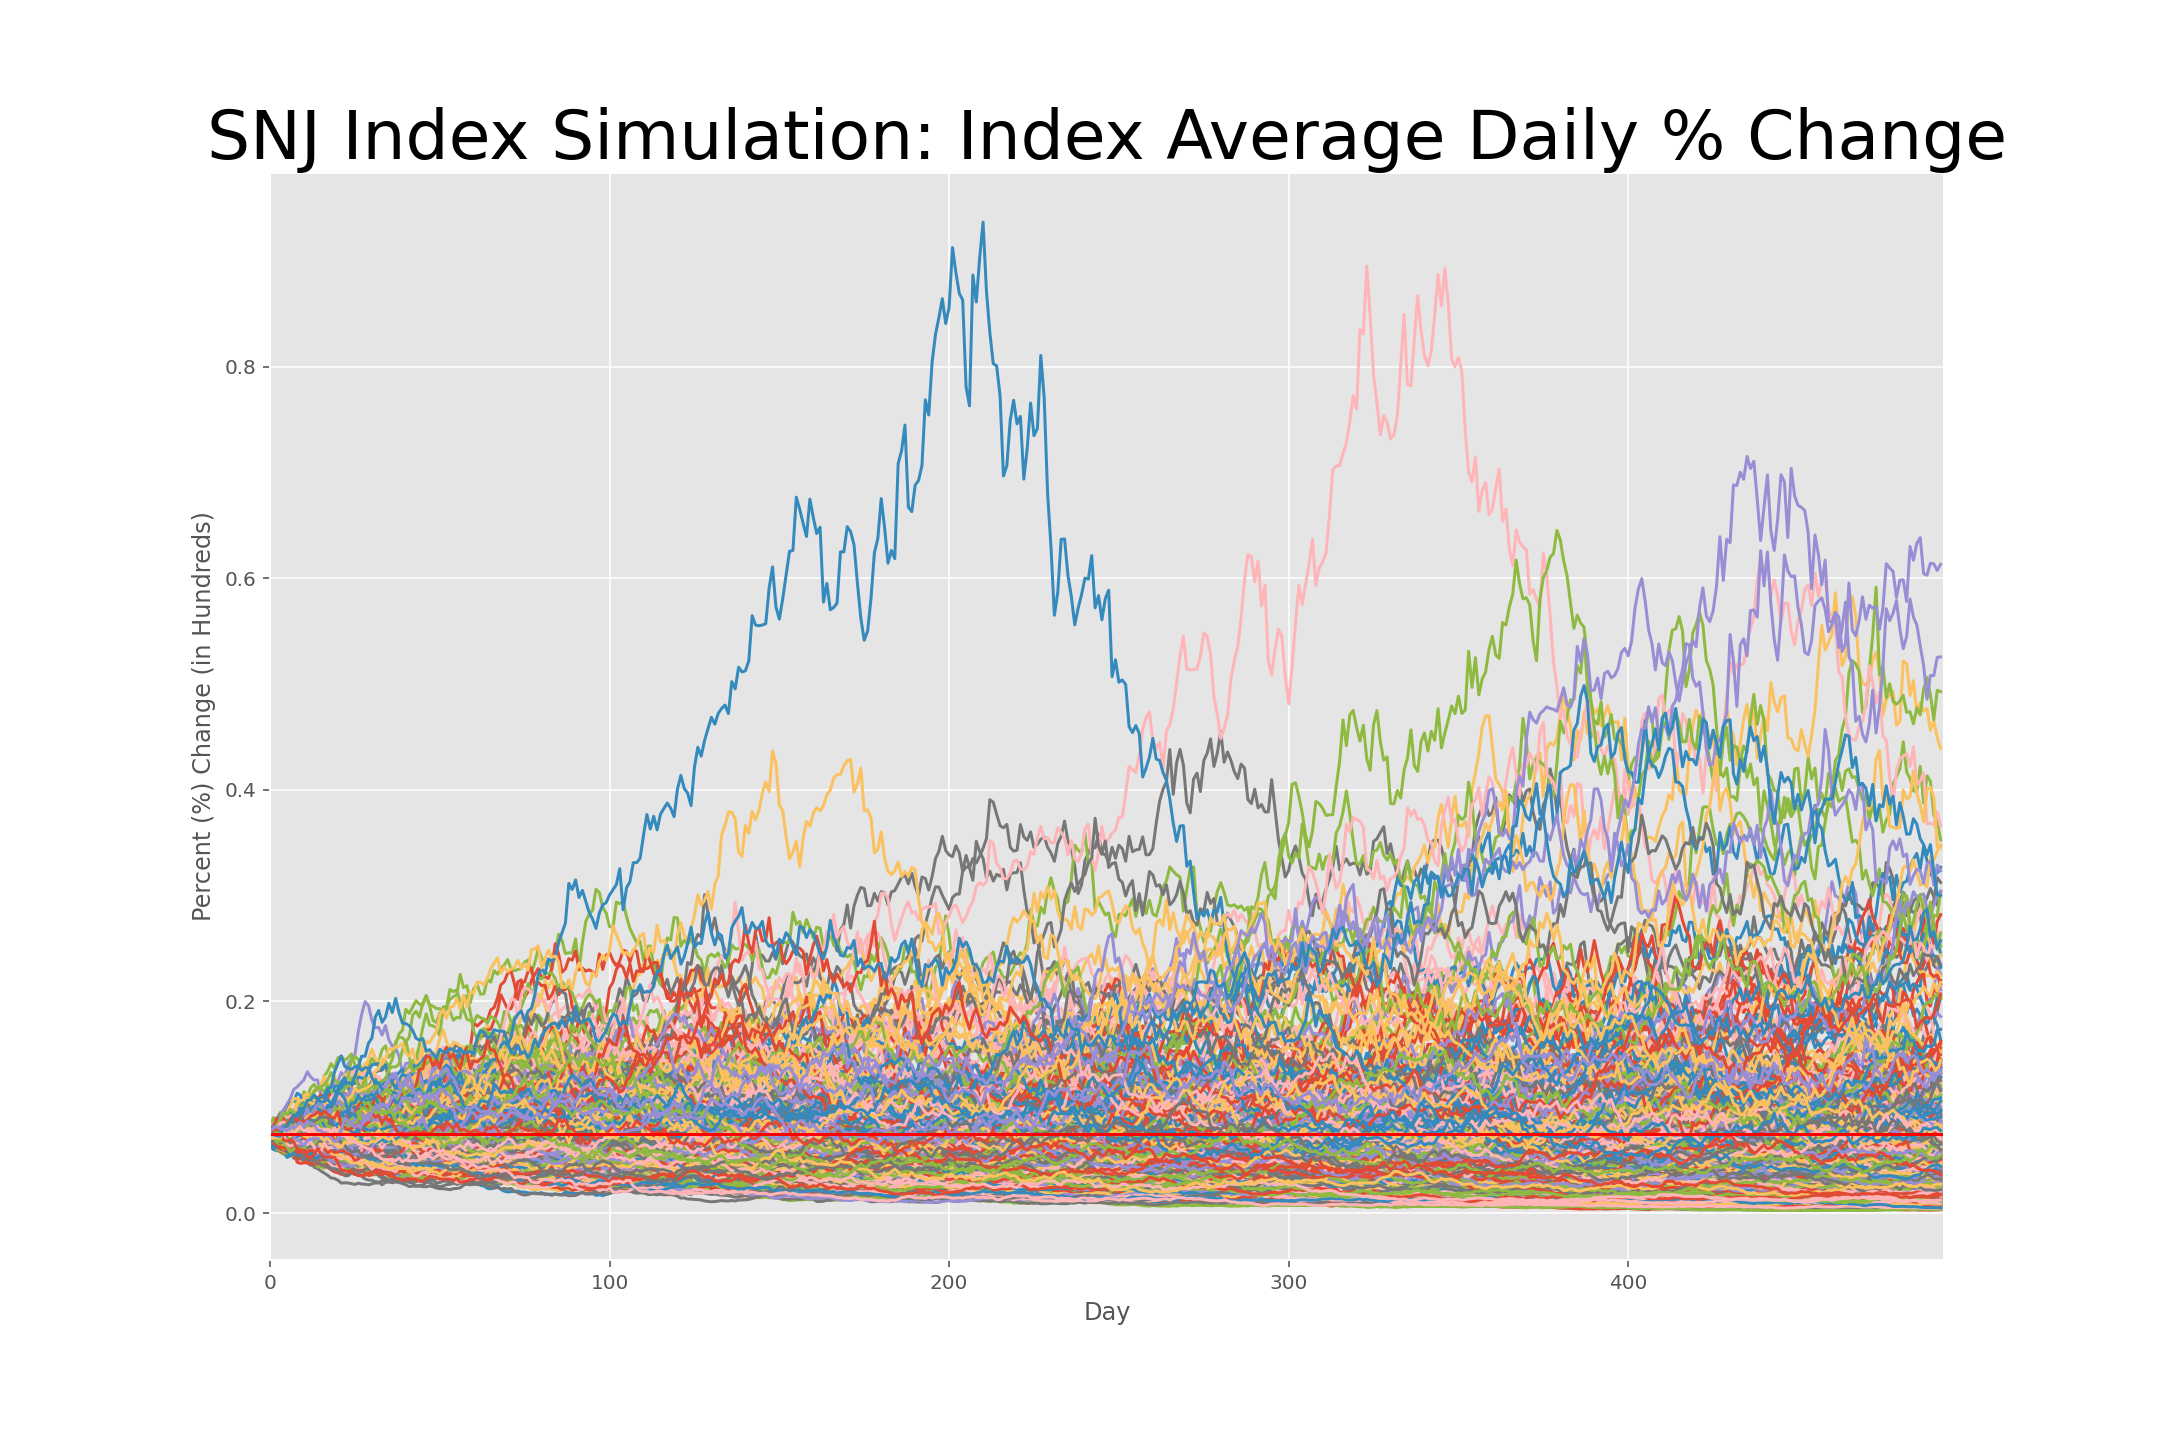
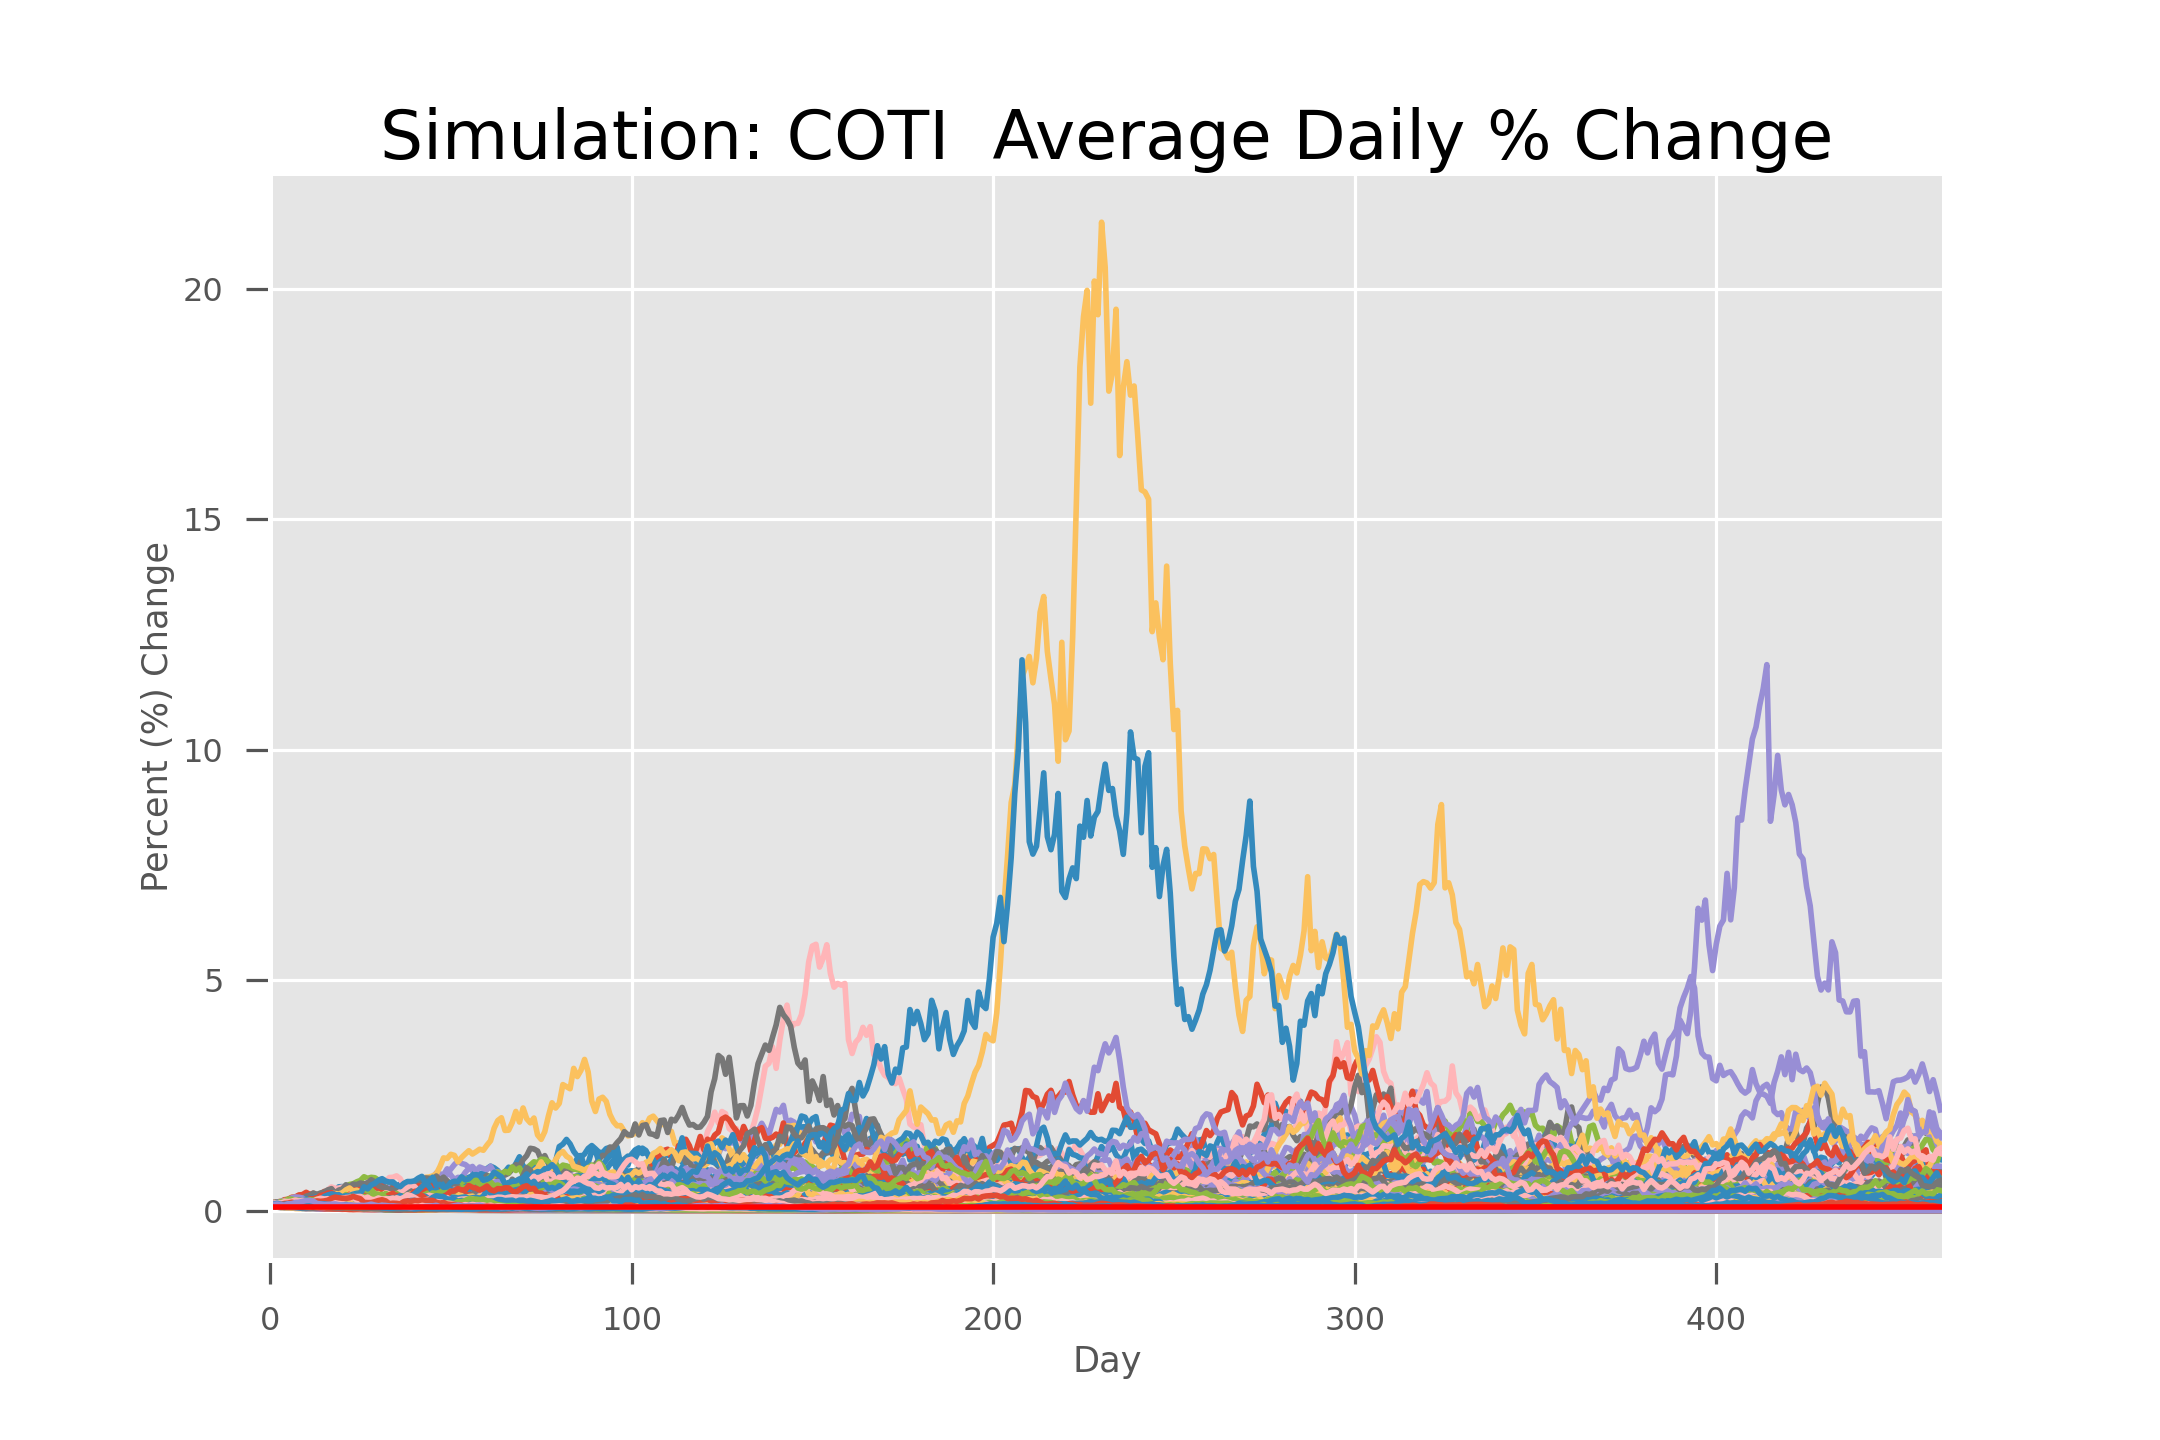

In [58]:
# Render the dashboard in Notebook
dashboard.servable()

In [ ]:
# Render the dashboard in Browser tab to present
dashboard.show()

In [ ]:
#Chart plots for dashboard
# Crypto percent change charts
""""
btc_percent()
eth_percent()
ltc_percent()
link_percent()
xrp_percent()
trx_percent()

### Crypto History Char
crypto_index_chart()

### SNJ Index Sims
fig_index_monte()
fig_index_dist()
fig_index_swarm()

### New Crypto Sims
fig_crypto_monte()
fig_crypto_dist()
fig_crypto_monte()


def his_btc():
    return btc_price()
def his_eth():
    return eth_price()
def his_ltc():
    return ltc_price()
def his_link():
    return link_price()



crypto_portfolio_plots1  = pn.Column(
    '## SNJ Crypto History',
    pn.Row(
         
        btc_price.opts(title='Bitcoin Price History'), 
        eth_price.opts(title='Ethereum Price History'), 
        ltc_price.opts(title='Litecoin Price History'), ),
    pn.Row(
        link_price.opts(title='Chainlink Price History'), 
        xrp_price.opts(title='Ripple Price History'), 
        trx_price.opts(title='Tron Price History'), ),
        #cpt_port_choice(),
)


"""